In [4]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [5]:
data = pd.read_csv("IRIS.csv")

In [6]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
# analysing the data

In [17]:
!pip install fasteda
from fasteda import fast_eda

  Preparing metadata (setup.py) ... done
  Created wheel for fasteda: filename=fasteda-1.0.1-py3-none-any.whl size=4723 sha256=30dfc42c27c9aa45d564bb7ab0d9846e99a093379eba87c3060df562ddf0f8e3
  Stored in directory: /root/.cache/pip/wheels/ed/08/72/0d0ec0d3927d227b38ce9542ec3fa6b975c2e17ad0d046dcee
Successfully built fasteda


DataFrame Head:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


DataFrame Tail:


,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


----------------------------------------------------------------------------------------------------
Missing values:


,0


----------------------------------------------------------------------------------------------------
Shape of DataFrame:

(150, 5)

----------------------------------------------------------------------------------------------------
DataFrame Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
----------------------------------------------------------------------------------------------------
Describe DataFrame:



,count,mean,median,std,min,25%,50%,75%,max,skewness,kurtosis
sepal_length,150,5.843,5.8,0.828,4.3,5.1,5.8,6.4,7.9,0.311753,-0.573568
sepal_width,150,3.054,3,0.434,2,2.8,3,3.3,4.4,0.330703,0.241443
petal_length,150,3.759,4.35,1.764,1,1.6,4.35,5.1,6.9,-0.271712,-1.395359
petal_width,150,1.199,1.3,0.763,0.1,0.3,1.3,1.8,2.5,-0.103944,-1.335246


----------------------------------------------------------------------------------------------------
DataFrame Correlation:



/usr/local/lib/python3.10/dist-packages/fasteda/__init__.py:124: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap = "Spectral", linewidths = 2, linecolor = "#000000", fmt='.3f')


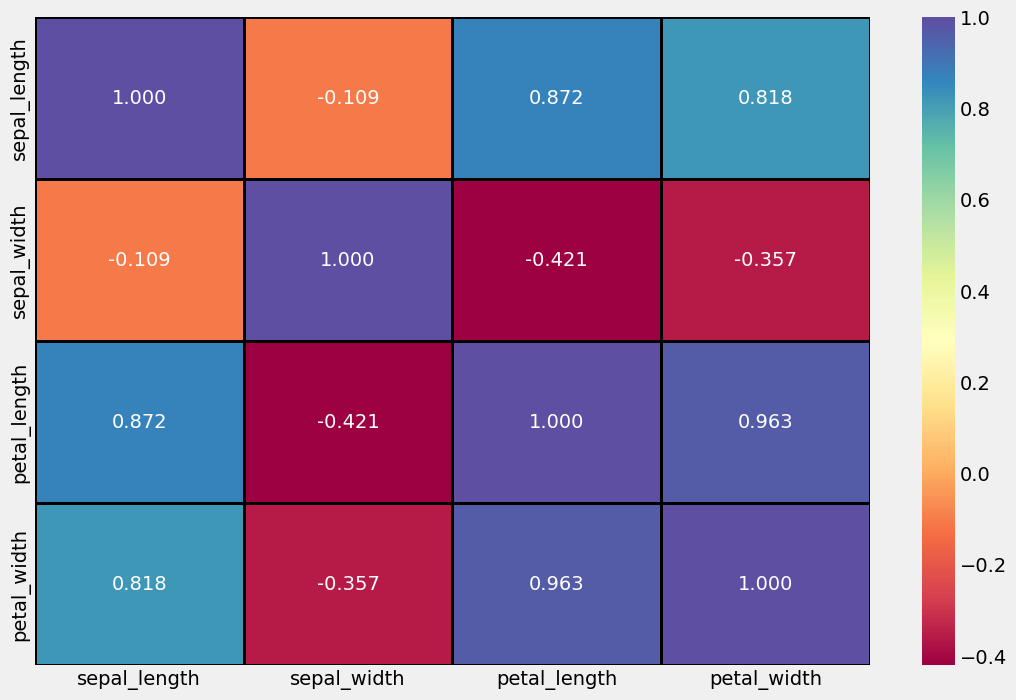

----------------------------------------------------------------------------------------------------
DataFrame Pairplot:



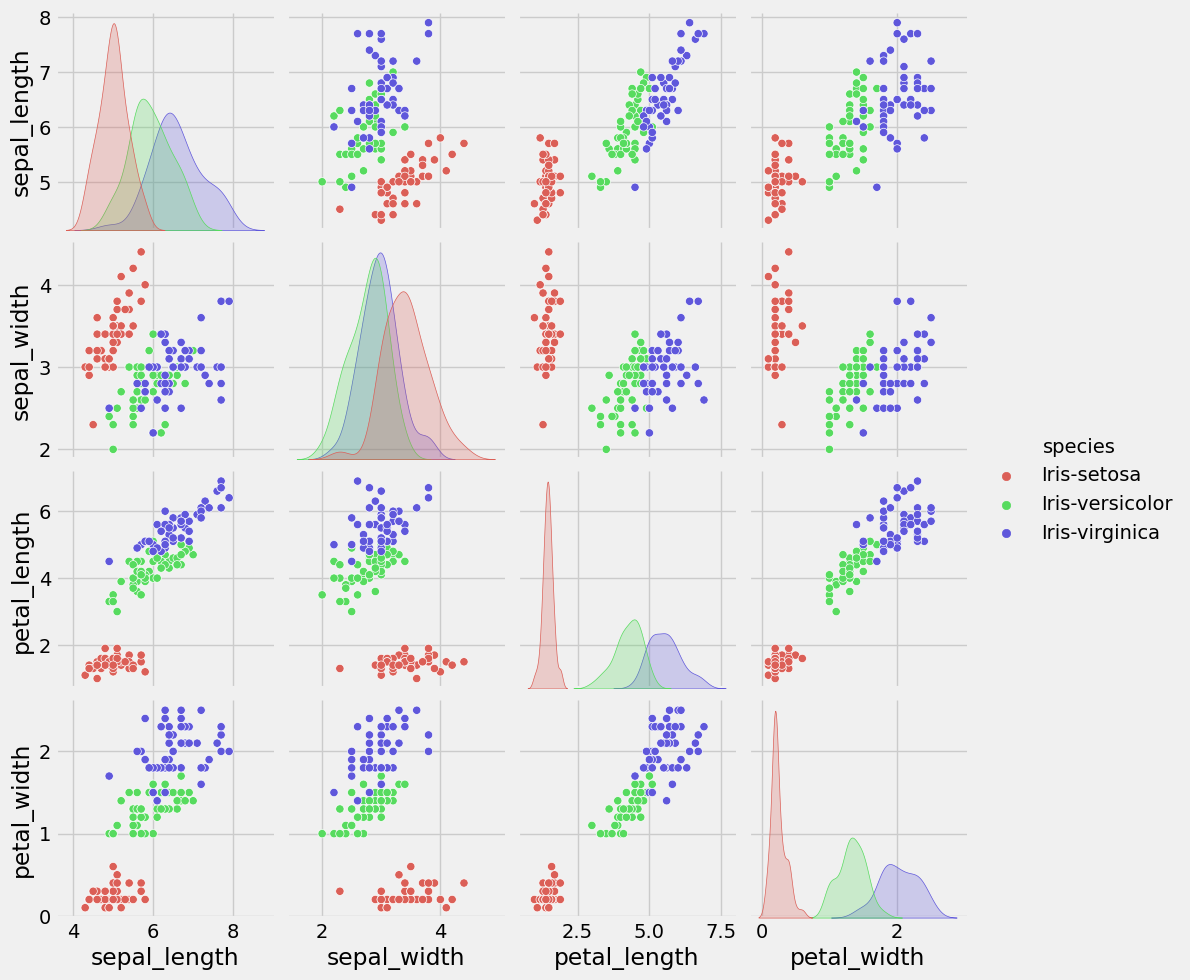

----------------------------------------------------------------------------------------------------
Histogram(s) & Boxplot(s):



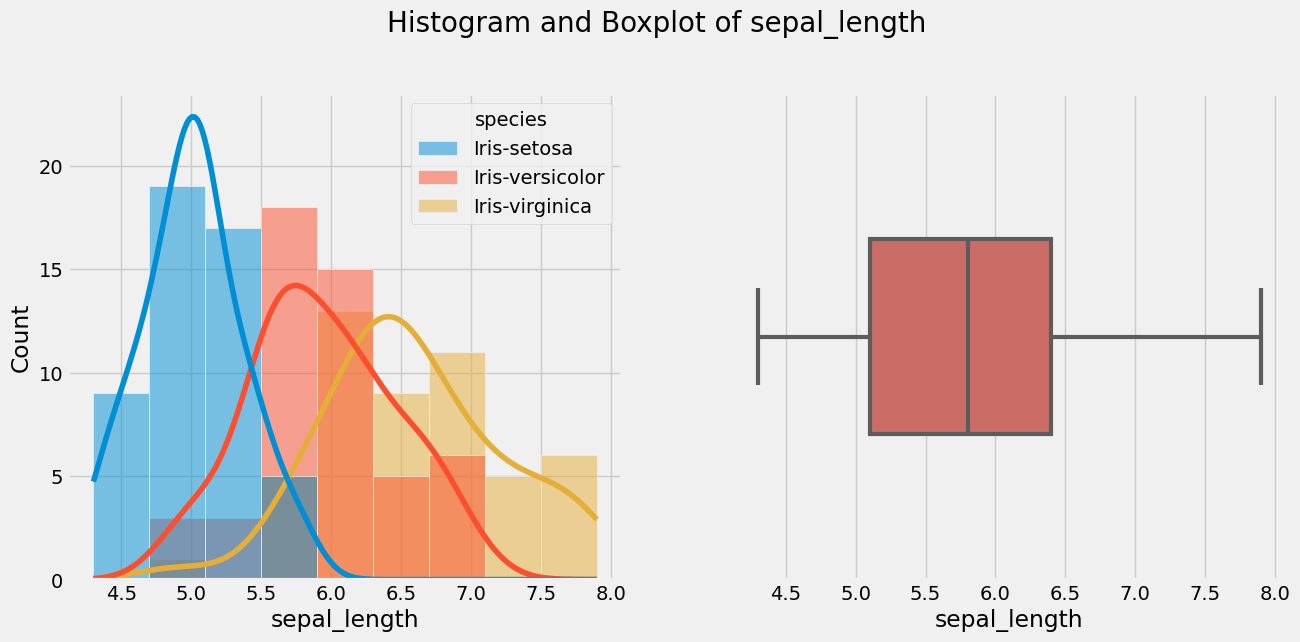

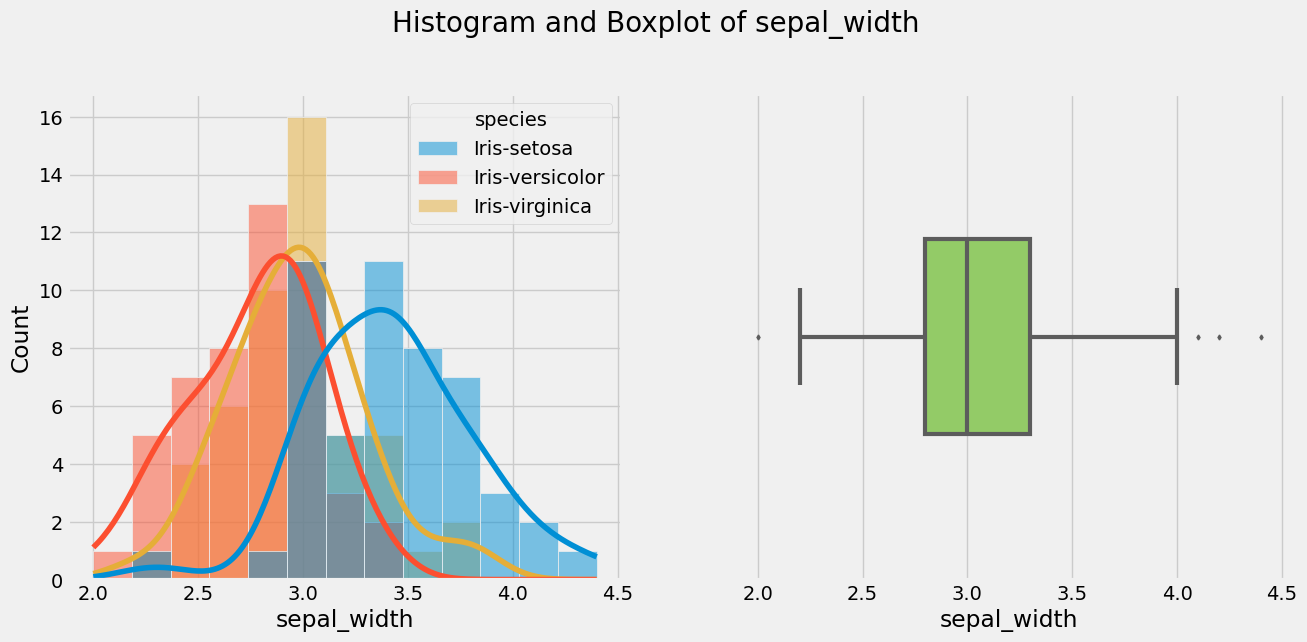

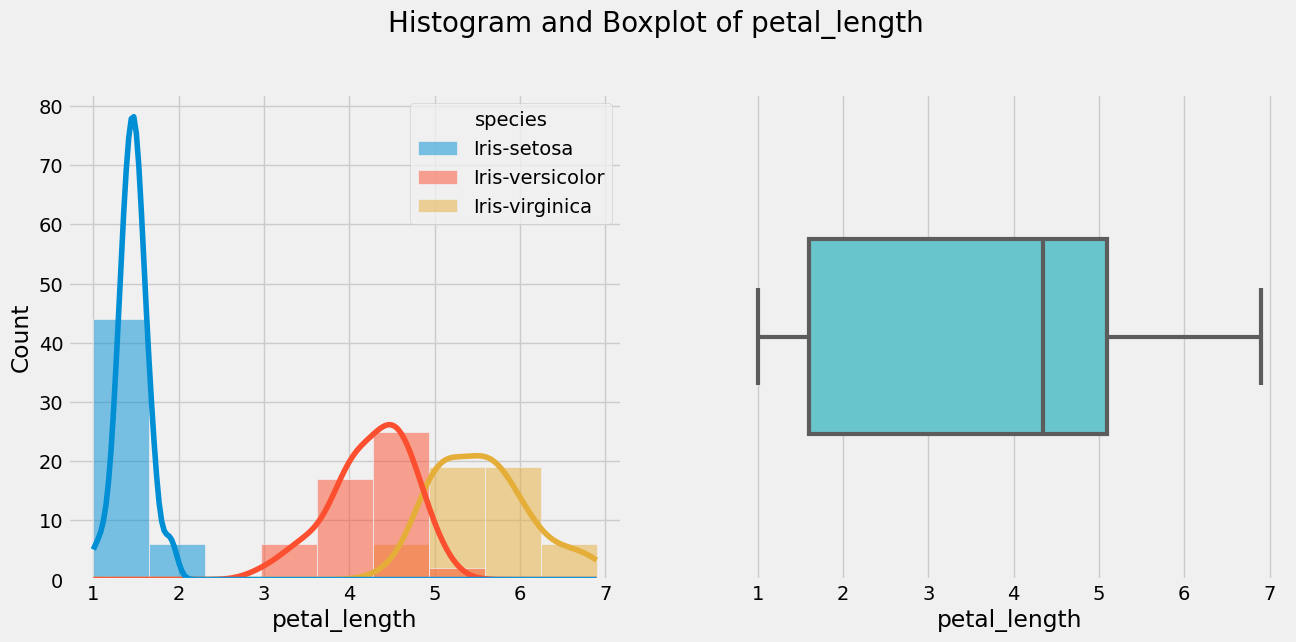

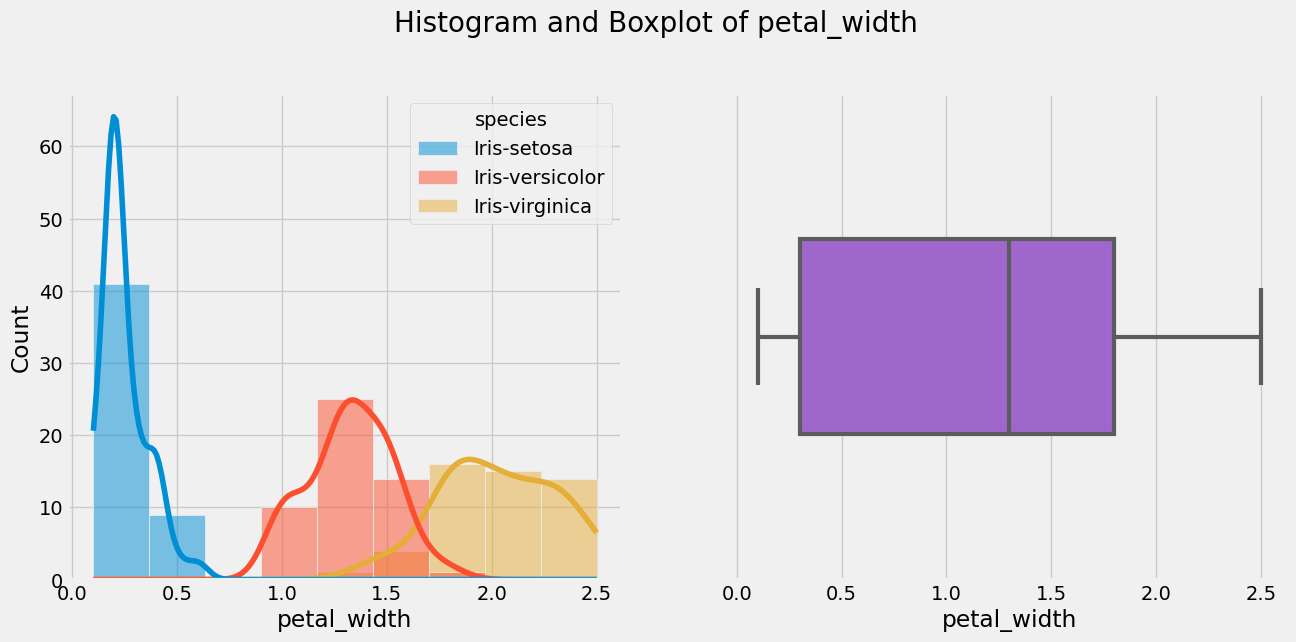

----------------------------------------------------------------------------------------------------
Countplot(s):



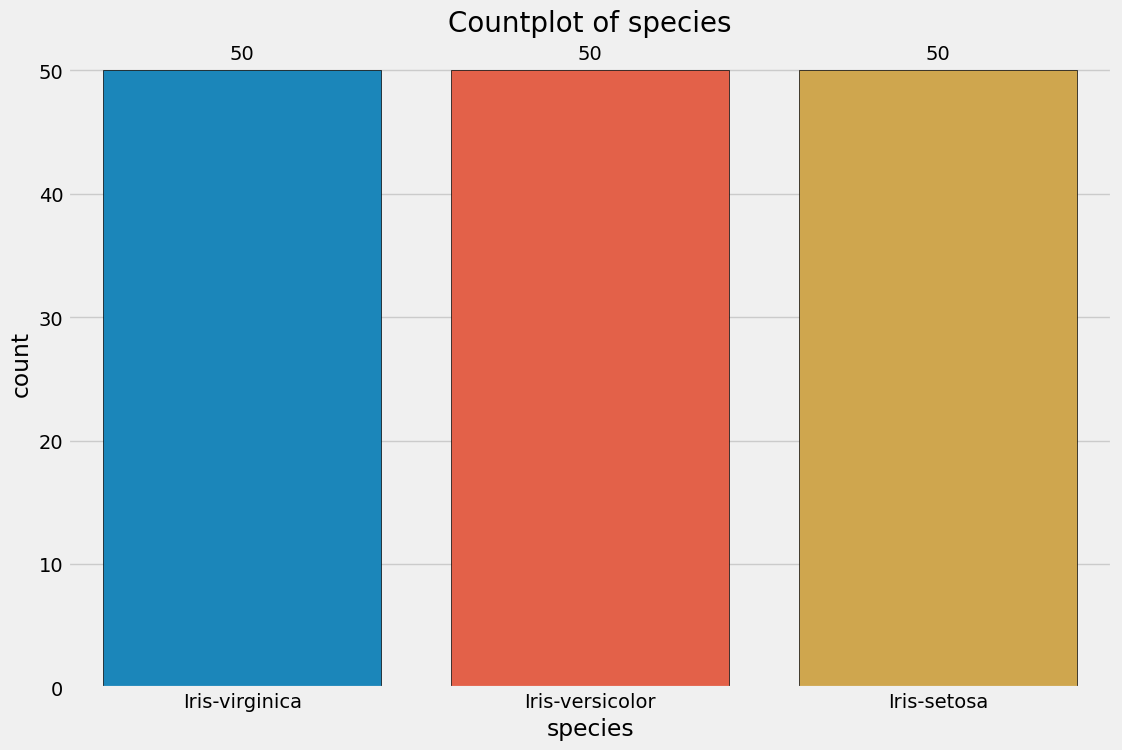

In [18]:
fast_eda(data, target="species")

In [28]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [29]:
data['species'] = encoder.fit_transform(data['species'].values.reshape(-1, 1))

data

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [30]:
x = data.drop(columns=['species'],axis=1)
y = data['species']

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state = 0)

In [32]:
history = Sequential([
    Dense(64, activation='relu', input_dim=x_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

In [33]:
history.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
4/4 [==============================] - 1s 6ms/step - loss: 1.0188 - accuracy: 0.4750
Epoch 2/50
4/4 [==============================] - 0s 3ms/step - loss: 0.9374 - accuracy: 0.3667
Epoch 3/50
4/4 [==============================] - 0s 3ms/step - loss: 0.8728 - accuracy: 0.5750
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 0.8112 - accuracy: 0.6917
Epoch 5/50
4/4 [==============================] - 0s 3ms/step - loss: 0.7709 - accuracy: 0.7750
Epoch 6/50
4/4 [==============================] - 0s 2ms/step - loss: 0.7166 - accuracy: 0.7833
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6732 - accuracy: 0.6917
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 0.6423 - accuracy: 0.6917
Epoch 9/50
4/4 [==============================] - 0s 4ms/step - loss: 0.6044 - accuracy: 0.7000
Epoch 10/50
4/4 [==============================] - 0s 3ms/step - loss: 0.5696 - accuracy: 0.8083
Epoch 11/50
4/4 [======================

In [35]:
feature_extractor = Sequential(history.layers[:-1])  # Remove the output layer
ann_features_train = feature_extractor.predict(x_train)
ann_features_test = feature_extractor.predict(x_test)

1/1 [==============================] - 0s 16ms/step


In [36]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
sc.fit(ann_features_test)
sc.fit(ann_features_train)

StandardScaler()

In [37]:
svm_model = SVC(kernel='linear')
svm_model.fit(ann_features_train, y_train)

SVC(kernel='linear')

In [38]:
svm_features_test = feature_extractor.predict(x_test)
sc.fit(svm_features_test)

# Make predictions using the trained SVM model
svm_predictions = svm_model.predict(svm_features_test)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of the combined model: {accuracy}")

1/1 [==============================] - 0s 38ms/step
Accuracy of the combined model: 1.0


In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Make predictions using the trained SVM model
svm_predictions = svm_model.predict(svm_features_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, svm_predictions)
print(f"Accuracy of the combined model: {accuracy:.2f}")

# Generate a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:")
print(cm)

Accuracy of the combined model: 1.00
Confusion Matrix:
[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


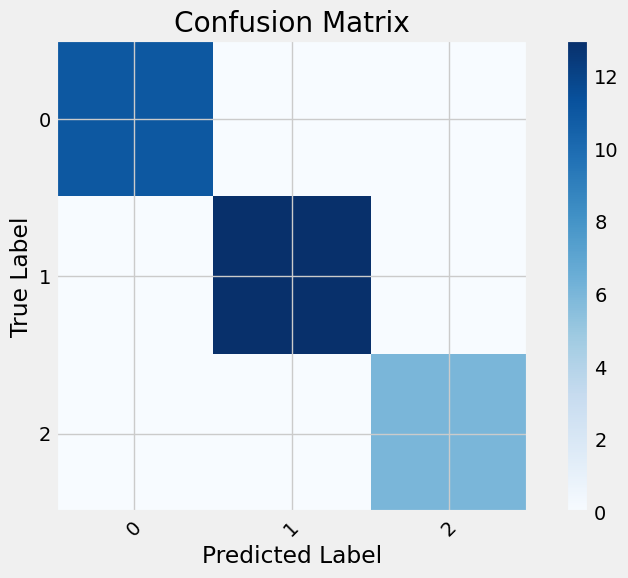

In [42]:
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
classes = data['species'].unique()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()